# Predicting Customer Will Churn Based on usage

#### Importing the Lib

In [8]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

from pylab import rcParams
import sklearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [2]:
data = pd.read_csv("data/Orange_Telecom_Churn_Data.csv")

In [3]:
data.head(1).T

,0
state,KS
account_length,128
area_code,415
phone_number,382-4657
intl_plan,no
voice_mail_plan,yes
number_vmail_messages,25
total_day_minutes,265.1
total_day_calls,110
total_day_charge,45.07


In [4]:
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [5]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

In [7]:
lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [10]:
msc = MinMaxScaler()
data = pd.DataFrame(msc.fit_transform(data), columns=data.columns)

In [11]:
x_cols = [x for x in data.columns if x != 'churned']

X_data = data[x_cols]
y_data = data['churned']

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [13]:
def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

In [14]:
print(accuracy(y_data, y_pred))

0.9422


In [15]:
knn = KNeighborsClassifier(n_neighbors=3,weights="distance")

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [16]:
print(accuracy(y_data, y_pred))

1.0


In [17]:
knn = KNeighborsClassifier(n_neighbors=3,weights="uniform",p=1)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [18]:
print(accuracy(y_data, y_pred))

0.9456


In [19]:
nn_vs_acc=[]
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k,weights="uniform",p=1)

    knn = knn.fit(X_data, y_data)

    y_pred = knn.predict(X_data)
    nn_vs_acc.append(accuracy(y_data,y_pred))

In [20]:
X=[x for x in range(1,20)]
Y=nn_vs_acc



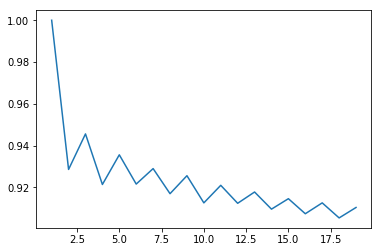

In [21]:
plt.plot(X,Y)
plt.show()